In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('dataset/owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73991,ZWE,Africa,Zimbabwe,2021-03-06,36260.0,12.0,28.857,1485.0,1.0,3.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73992,ZWE,Africa,Zimbabwe,2021-03-07,36271.0,11.0,26.000,1485.0,0.0,3.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73993,ZWE,Africa,Zimbabwe,2021-03-08,36289.0,18.0,24.857,1487.0,2.0,2.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73994,ZWE,Africa,Zimbabwe,2021-03-09,36321.0,32.0,24.714,1489.0,2.0,2.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [3]:
df.shape

(73996, 59)

In [4]:
print(df['location'].value_counts())

Mexico              435
Argentina           435
Thailand            432
Taiwan              420
South Korea         415
                   ... 
Falkland Islands     16
Montserrat           16
Macao                11
Northern Cyprus       9
Saint Helena          1
Name: location, Length: 215, dtype: int64


## Data Cleansing

In [5]:
df_ina=df.loc[df['location']=='United Kingdom']
df_ina=df_ina.reset_index(drop=True)

In [6]:
df_ina.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
1,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
2,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
3,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
4,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932


In [7]:
df_ina.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
400,GBR,Europe,United Kingdom,2021-03-06,4225906.0,6118.0,6162.000,124654.0,159.0,245.000,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
401,GBR,Europe,United Kingdom,2021-03-07,4231166.0,5260.0,6048.429,124736.0,82.0,236.143,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
402,GBR,Europe,United Kingdom,2021-03-08,4235989.0,4823.0,5957.143,124801.0,65.0,230.571,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
403,GBR,Europe,United Kingdom,2021-03-09,4241858.0,5869.0,5879.714,125032.0,231.0,214.571,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
404,GBR,Europe,United Kingdom,2021-03-10,4247879.0,6021.0,5822.714,125222.0,190.0,172.143,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932


In [8]:
df_ina.shape

(405, 59)

In [9]:
df_ina.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [10]:
df_ina=df_ina[['date','total_cases','new_cases','total_deaths','new_deaths']]

In [11]:
df_ina

,date,total_cases,new_cases,total_deaths,new_deaths
0,2020-01-31,2.0,2.0,NaN,NaN
1,2020-02-01,2.0,0.0,NaN,NaN
2,2020-02-02,2.0,0.0,NaN,NaN
3,2020-02-03,8.0,6.0,NaN,NaN
4,2020-02-04,8.0,0.0,NaN,NaN
...,...,...,...,...,...
400,2021-03-06,4225906.0,6118.0,124654.0,159.0
401,2021-03-07,4231166.0,5260.0,124736.0,82.0
402,2021-03-08,4235989.0,4823.0,124801.0,65.0
403,2021-03-09,4241858.0,5869.0,125032.0,231.0


In [12]:
df_ina=df_ina.fillna(0)

In [13]:
df_ina

,date,total_cases,new_cases,total_deaths,new_deaths
0,2020-01-31,2.0,2.0,0.0,0.0
1,2020-02-01,2.0,0.0,0.0,0.0
2,2020-02-02,2.0,0.0,0.0,0.0
3,2020-02-03,8.0,6.0,0.0,0.0
4,2020-02-04,8.0,0.0,0.0,0.0
...,...,...,...,...,...
400,2021-03-06,4225906.0,6118.0,124654.0,159.0
401,2021-03-07,4231166.0,5260.0,124736.0,82.0
402,2021-03-08,4235989.0,4823.0,124801.0,65.0
403,2021-03-09,4241858.0,5869.0,125032.0,231.0


## Explorating Data and Analyzing (EDA)

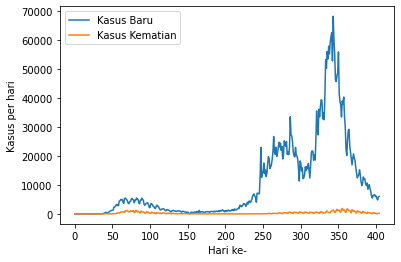

In [14]:
df_ina['new_cases'].plot(label='Kasus Baru')
df_ina['new_deaths'].plot(label='Kasus Kematian')
plt.xlabel('Hari ke-')
plt.ylabel('Kasus per hari')
plt.legend(loc='best')
plt.show()

In [15]:
for i in range(len(df_ina)):
    if df_ina['new_cases'].iloc[i]==df_ina['new_cases'].max():
        print("Tanggal kasus positif tertinggi {}".format(df_ina['date'].iloc[i]))
        print('Dengan jumlah= {}'.format(df_ina['new_cases'].iloc[i]))
        break

Tanggal kasus positif tertinggi 2021-01-08
Dengan jumlah= 68192.0


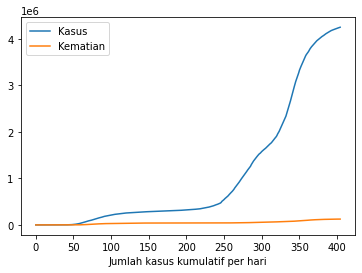

In [16]:
df_ina['total_cases'].plot(label='Kasus')
df_ina['total_deaths'].plot(label='Kematian')
plt.xlabel('Hari ke-')
plt.xlabel('Jumlah kasus kumulatif per hari')
plt.legend(loc='best')
plt.show()

## Model Prediksi

original sigmoid
$$ sig(t)=\frac{1}{1+e^{-t}}$$
modifikasi
$$ sig_m(t)=\frac{1}{1+e^{-(t-t_0)/a}}$$

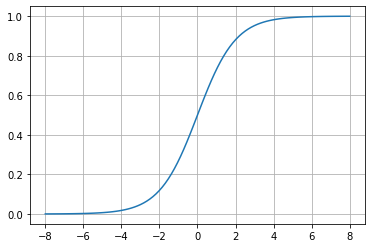

In [17]:
puncak=1
x=np.linspace(-8,8,100)
y=puncak/(1+np.exp(-x))
plt.plot(x,y, label='Sigmoid')
plt.grid()
plt.show()

In [18]:
def kurva_sigmoid(t,a,t0,c):
    return c/(1+np.exp(-(t-t0)/(a)))

In [19]:
x=list(df_ina.index)
y=list(df_ina['total_cases'])

In [22]:
from scipy.optimize import curve_fit, fsolve

In [27]:
fit=curve_fit(kurva_sigmoid,x,y, method='lm')
varA,varB=fit

In [28]:
varA

array([4.51786885e+01, 3.43301395e+02, 5.75459649e+06])

In [29]:
varB

array([[9.51046894e-01, 2.11356403e+00, 1.12869840e+05],
       [2.11356403e+00, 5.93190451e+00, 3.13795060e+05],
       [1.12869840e+05, 3.13795060e+05, 1.71651517e+10]])

In [30]:
std_er=np.zeros(len(varA))
for i in range(len(varA)):
    std_er[i]=np.sqrt(varB[i][i])

In [31]:
std_er

array([9.75216332e-01, 2.43555015e+00, 1.31015845e+05])

In [32]:
a=varA[0]+std_er[0]
t0=varA[1]+std_er[1]
c=varA[2]+std_er[2]

In [33]:
def puncak(x):
    return kurva_sigmoid(x,a,t0,c)-int(c)

In [34]:
n_puncak=int(fsolve(puncak,t0))

In [35]:
print('Hari puncak wabah covid-19 adalah hari ke-'+str(n_puncak))

Hari puncak wabah covid-19 adalah hari ke-1116


## Analisis

In [36]:
n_0=max(x)+1
pred_x=list(range(n_0,n_puncak))

In [37]:
print("Kita memiliki {} hari menuju puncak wabah".format(str(len(pred_x))))

Kita memiliki 711 hari menuju puncak wabah


In [38]:
pred_y=np.zeros(len(x+pred_x))
for i in range(n_puncak):
    pred_y[i]=kurva_sigmoid(i,a,t0,c)

In [39]:
print('Prediksi jumlah puncak {} orang'.format(int(pred_y[-1])))

Prediksi jumlah puncak 5885611 orang


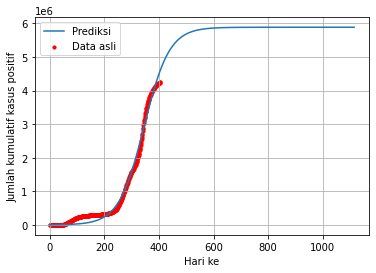

In [40]:
plt.plot(x+pred_x, pred_y, label='Prediksi')
plt.scatter(x,y, label='Data asli', s=10, color='red')
plt.xlabel('Hari ke')
plt.ylabel('Jumlah kumulatif kasus positif')
plt.grid()
plt.legend(loc='best')
plt.show()

## Akurasi

## R2 Skor
$$ R^2=1-\frac{S_{res}}{S_{tot}}$$
$$ R^2= 1-\frac{\Sigma (y_i-\hat{y_i})^2}{\Sigma (y_i-\bar{y})^2}$$

In [41]:
def akurasi_r2(y_asli, y_prediksi, x):
    atas=sum((y_asli-y_prediksi[0:len(x)])**2)
    bawah=sum((y_asli-np.mean(y))**2)
    r=1-(atas/bawah)
    return r

In [42]:
akur=akurasi_r2(y,pred_y,x)

In [43]:
akur*100

98.89775009928792

In [44]:
from datetime import datetime, timedelta

In [45]:
df_ina

,date,total_cases,new_cases,total_deaths,new_deaths
0,2020-01-31,2.0,2.0,0.0,0.0
1,2020-02-01,2.0,0.0,0.0,0.0
2,2020-02-02,2.0,0.0,0.0,0.0
3,2020-02-03,8.0,6.0,0.0,0.0
4,2020-02-04,8.0,0.0,0.0,0.0
...,...,...,...,...,...
400,2021-03-06,4225906.0,6118.0,124654.0,159.0
401,2021-03-07,4231166.0,5260.0,124736.0,82.0
402,2021-03-08,4235989.0,4823.0,124801.0,65.0
403,2021-03-09,4241858.0,5869.0,125032.0,231.0


In [46]:
fmt='%Y-%m-%d'
n1=df_ina['date'][0]
tgl_0=datetime.strptime(n1,fmt)
print(tgl_0)

2020-01-31 00:00:00


In [47]:
type(tgl_0), type(df_ina['date'][0])

(datetime.datetime, str)

In [48]:
tgl_puncak=tgl_0+timedelta(days=n_puncak)

In [49]:
h_puncak=tgl_puncak.strftime(fmt)

In [50]:
print("Tanggal puncak jumlah kasus COVID-19 di indonesia",h_puncak)

Tanggal puncak jumlah kasus COVID-19 di indonesia 2023-02-20


In [51]:
df_ina.tail(20)

,date,total_cases,new_cases,total_deaths,new_deaths
385,2021-02-19,4107290.0,12099.0,120147.0,533.0
386,2021-02-20,4117743.0,10453.0,120593.0,446.0
387,2021-02-21,4127578.0,9835.0,120810.0,217.0
388,2021-02-22,4138237.0,10659.0,120988.0,178.0
389,2021-02-23,4146760.0,8523.0,121536.0,548.0
390,2021-02-24,4156707.0,9947.0,121979.0,443.0
391,2021-02-25,4166727.0,10020.0,122303.0,324.0
392,2021-02-26,4175315.0,8588.0,122648.0,345.0
393,2021-02-27,4182772.0,7457.0,122939.0,291.0
394,2021-02-28,4188827.0,6055.0,123083.0,144.0


## Visualisasi Data Prediksi

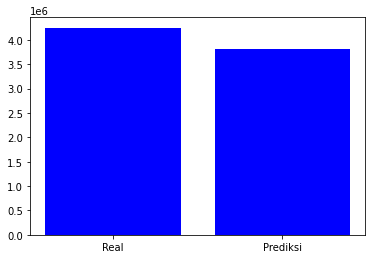

In [52]:
label=['Real','Prediksi']
value=[df_ina['total_cases'].iloc[-1],pred_y[374]]
plt.bar(label,value, color='blue')
plt.show()

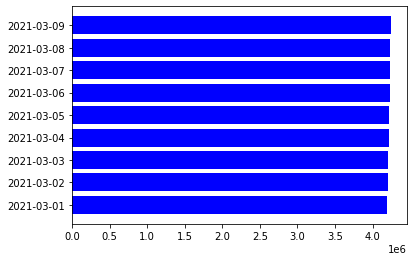

In [53]:
label=np.array(df_ina['date'].iloc[-10:-1], dtype=str)
value=np.array(df_ina['total_cases'].iloc[-10:-1], dtype=int)
plt.barh(label,value, color='blue')
plt.show()